In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import requests

In [17]:
# Load data from CSV file
data = pd.read_csv('../../data/processed/users_data.csv', encoding='latin1')
provinces = pd.read_csv('../../data/processed/provinces.csv', encoding='latin1')

In [12]:
# Check the first few lines of the data
print(data.head())
print('---------------------------------------------')

# Check the number of rows and columns of the data
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")
print('---------------------------------------------')

# Check for missing values in the data
print(data.isnull().sum())
print('---------------------------------------------')

# Check the data types of the columns
print(data.dtypes)
print('---------------------------------------------')


       id  city_id  followers  following created_at updated_at
0  346687      0.0          0          2   28-07-10   12-05-23
1  404506      0.0          6          8   17-09-10   24-04-23
2  510444      NaN          0          1   05-12-10   27-03-21
3  584572      NaN          5          5   26-01-11   06-06-23
4  705308      0.0         49         36   02-04-11   03-05-23
---------------------------------------------
Number of rows: 1758
Number of columns: 6
---------------------------------------------
id              0
city_id       686
followers       0
following       0
created_at      0
updated_at      0
dtype: int64
---------------------------------------------
id              int64
city_id       float64
followers       int64
following       int64
created_at     object
updated_at     object
dtype: object
---------------------------------------------


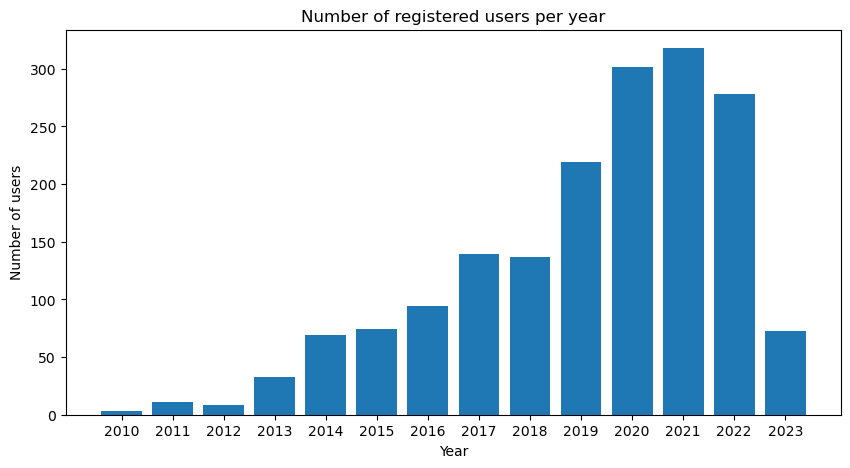

In [20]:
# Convert the "created_at" column to datetime type
data['created_at'] = pd.to_datetime(data['created_at'])

# Extract the years and the corresponding number of users
years = data['created_at'].dt.year
sorted_years = Counter(years)
sorted_years = dict(sorted(sorted_years.items(), key=lambda x: x[0]))

# Display the chart of the years
years = [i for i, _ in sorted_years.items()]
entries = [i for _, i in sorted_years.items()]

plt.figure(figsize=(10, 5)) 
plt.bar(range(len(years)), entries)
plt.xticks(range(len(years)), years)
plt.xlabel('Year')
plt.ylabel('Number of users')
plt.title('Number of registered users per year')

plt.show()


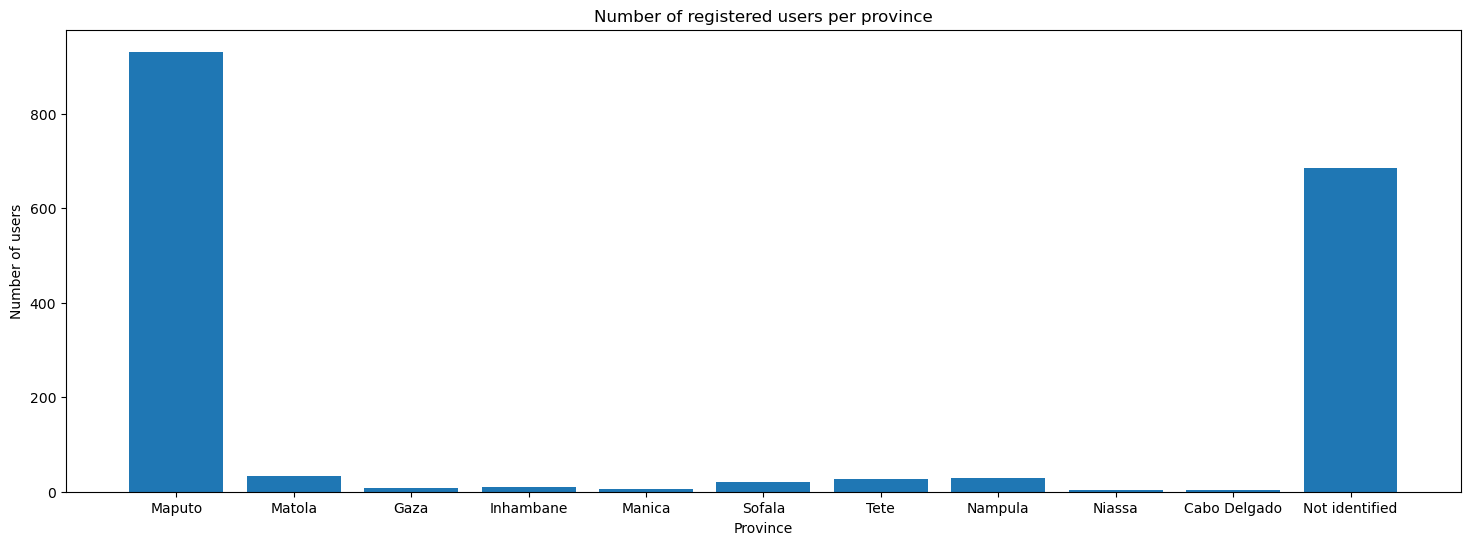

In [18]:
# Convert the "city_id" column to Int64 type and replace null ids with 11
data['city_id'] = data['city_id'].fillna(11)
data['city_id'] = data['city_id'].astype(int)

# Extract the years and the corresponding number of users
sorted_city_id = Counter(data['city_id'])
sorted_city_id = dict(sorted(sorted_city_id.items(), key=lambda x: x[0]))

# Display the chart of years
province = [provinces['name'].to_list()[i] for i, _ in sorted_city_id.items()]
users = [i for _, i in sorted_city_id.items()]

plt.figure(figsize=(18, 6))
plt.bar(range(len(province)), users)
plt.xticks(range(len(province)), province)
plt.xlabel('Province')
plt.ylabel('Number of users')
plt.title('Number of registered users per province')

plt.show()


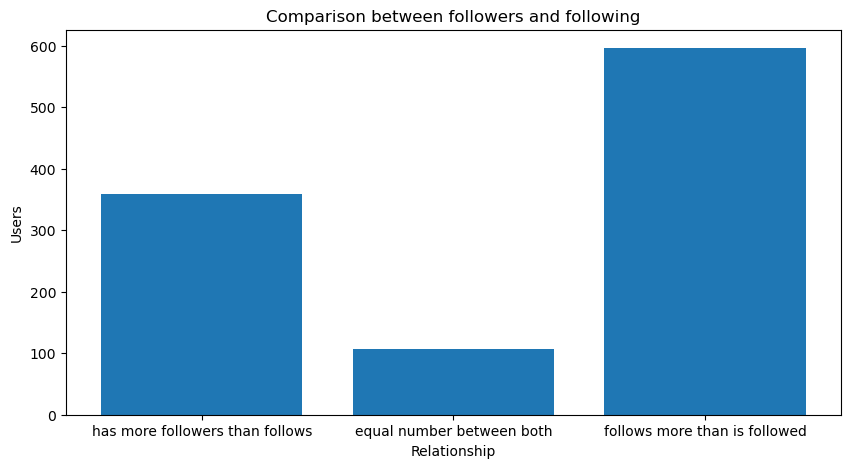

In [16]:
x = np.array(data['followers'])
y = np.array(data['following'])

# Comparison between elements of x and y
greater_than = np.sum(x > y)
equal_to = np.sum(x == y)
less_than = np.sum(x < y)
both_zero = np.sum((x == y) & (x == 0))

# Remove inactivity
equal_to = equal_to - both_zero

# Create bar chart
labels = ['has more followers than follows', 'equal number between both', 'follows more than is followed']
values = [greater_than, equal_to, less_than]

plt.figure(figsize=(10, 5))
plt.bar(labels, values)
plt.title('Comparison between followers and following')
plt.xlabel('Relationship')
plt.ylabel('Users')

plt.show()
